<a href="https://colab.research.google.com/github/aditya7139/project_cse/blob/main/project_3_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for the Detection of Network Attacks


Analyse the machine learning algorithms on the [CICIDS 2017 Dataset] for clasification of network attacks.
(https://www.unb.ca/cic/datasets/ids-2017.html): 

- Support Vector Machine (SVM)
- Decision Tree
- Naive Bayes
- K Means Clustering 
- K Nearest Neighbours


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import required libraries.

In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sn
import time

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

from sklearn.model_selection import train_test_split

# Loading the dataset

The implemented attacks include Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet and DDoS. 

Datasets is available in 8 different csv files.

- Monday-WorkingHours.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Wednesday-workingHours.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv

8 different csv files of cicids dataset needs to be concatenated into a single csv file.

In [3]:
# # path to the all 8 files of CICIDS dataset.
# path = './datasets'
# all_files = glob.glob(path + "/*.csv")

# # concatenate the 8 files into 1.
# dataset = pd.concat((pd.read_csv(f) for f in all_files))

In [4]:
# # saving the combined dataset to disk named cicids.csv
# dataset.to_csv('cicids')

In [5]:
# dataset=pd.read_csv('cicids.csv')
dataset=pd.read_csv('drive/MyDrive/datasets/cicids.zip')

In [6]:
# Dimenions of dataset.
print(dataset.shape)

(2827876, 79)


In [7]:
# column names as per dataset.

col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [8]:
# Max rows and colummns to be shown in print console

pd.options.display.max_columns= 200
pd.options.display.max_rows= 200

In [9]:
# Assigning the column names.
dataset.columns = col_names

# first 5 records in the dataset.
dataset.head(5)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Header_Length,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
# check whether there is any categorical column are not if it is there it is to be encoded.
dataset.dtypes

Destination_Port                 int64
Flow_Duration                    int64
Total_Fwd_Packets                int64
Total_Backward_Packets           int64
Total_Length_of_Fwd_Packets      int64
Total_Length_of_Bwd_Packets      int64
Fwd_Packet_Length_Max            int64
Fwd_Packet_Length_Min            int64
Fwd_Packet_Length_Mean           int64
Fwd_Packet_Length_Std          float64
Bwd_Packet_Length_Max          float64
Bwd_Packet_Length_Min            int64
Bwd_Packet_Length_Mean           int64
Bwd_Packet_Length_Std          float64
Flow_Bytes_s                   float64
Flow_Packets_s                 float64
Flow_IAT_Mean                  float64
Flow_IAT_Std                   float64
Flow_IAT_Max                   float64
Flow_IAT_Min                     int64
Fwd_IAT_Total                    int64
Fwd_IAT_Mean                     int64
Fwd_IAT_Std                    float64
Fwd_IAT_Max                    float64
Fwd_IAT_Min                      int64
Bwd_IAT_Total            

# Remove repeated columns, (NaN,Null,Infinite) values.

In [11]:
# Removing the duplicate columns (Header_length is repeated)
dataset = dataset.loc[:, ~dataset.columns.duplicated()]
dataset.shape

(2827876, 78)

In [12]:
# check if there are any Null values
dataset.isnull().any().any()

False

In [13]:
# Replace Inf values with NaN
dataset = dataset.replace([np.inf, -np.inf], np.nan)

# Drop all occurences of NaN
dataset = dataset.dropna()

# Double check these are all gone
dataset.isnull().any()

Destination_Port               False
Flow_Duration                  False
Total_Fwd_Packets              False
Total_Backward_Packets         False
Total_Length_of_Fwd_Packets    False
Total_Length_of_Bwd_Packets    False
Fwd_Packet_Length_Max          False
Fwd_Packet_Length_Min          False
Fwd_Packet_Length_Mean         False
Fwd_Packet_Length_Std          False
Bwd_Packet_Length_Max          False
Bwd_Packet_Length_Min          False
Bwd_Packet_Length_Mean         False
Bwd_Packet_Length_Std          False
Flow_Bytes_s                   False
Flow_Packets_s                 False
Flow_IAT_Mean                  False
Flow_IAT_Std                   False
Flow_IAT_Max                   False
Flow_IAT_Min                   False
Fwd_IAT_Total                  False
Fwd_IAT_Mean                   False
Fwd_IAT_Std                    False
Fwd_IAT_Max                    False
Fwd_IAT_Min                    False
Bwd_IAT_Total                  False
Bwd_IAT_Mean                   False
B

# Analysing the attacks in dataset

In [14]:
# Distribution of Dataset
dataset['Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

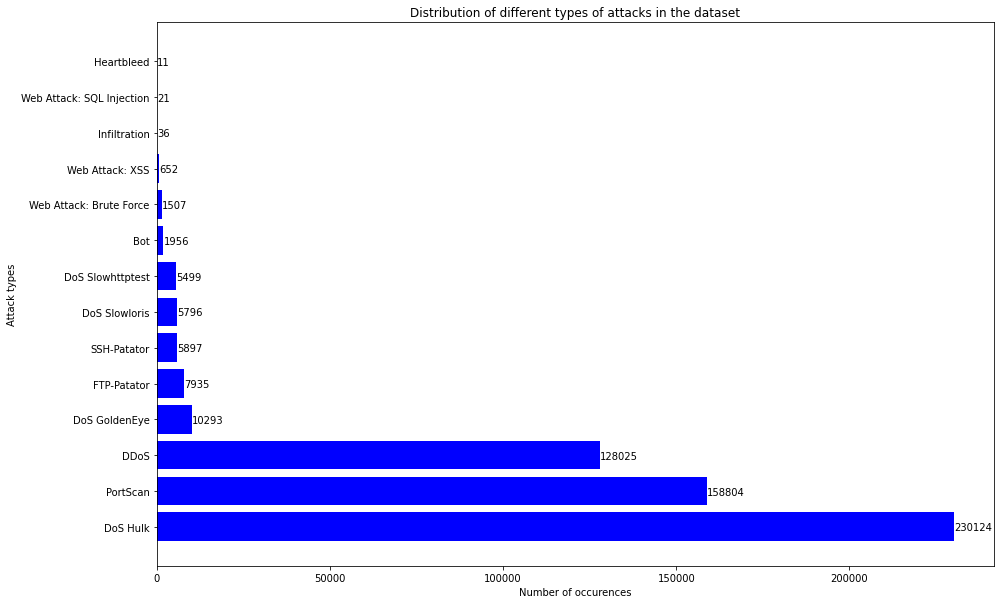

In [15]:
# Plotting the distribution of attacks in the dataset

plt.figure(figsize=(15,10))

attack = ('DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS Slowloris',
          'DoS Slowhttptest', 'Bot', 'Web Attack: Brute Force', 'Web Attack: XSS', 'Infiltration', 'Web Attack: SQL Injection', 'Heartbleed')
y_pos = np.arange(len(attack)) 
amount = dataset['Label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='blue' )
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

In [16]:
# There are only 11, 21, and 36 instances of Heartbleed, SQL injection and infiltration respectively. 
# Remove 'Heartbleed', 'Web attack Sql Injection', 'Infiltration' as it's negligible.

dataset = dataset.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
dataset = dataset.dropna()
dataset['Label'].value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1507
Web Attack � XSS                652
Name: Label, dtype: int64

In [17]:
# Labelling Web Attack � Brute Force as Brute Force
# labelling Web Attack � XSS as XSS

dataset.loc[dataset.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
dataset.loc[dataset.Label == 'Web Attack � XSS', ['Label']] = 'XSS'

In [18]:
# Creating a attack column, containing binary labels for normal and attack to apply binary classsifier

dataset['Attack'] = np.where(dataset['Label'] == 'BENIGN','Normal' , 'Attack')

In [19]:
# Grouping attack labels in attack category as in dataset description for multi-class classifier

attack_group = {'BENIGN': 'benign', 
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Brute Force': 'web_attack', 
                'XSS': 'web_attack'}

# Create grouped label column

dataset['Label_Category'] = dataset['Label'].map(lambda x: attack_group[x])
dataset['Label_Category'].value_counts()

benign         2271320
dos             251712
probe           158804
ddos            128025
brute_force      13832
web_attack        2159
botnet            1956
Name: Label_Category, dtype: int64

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

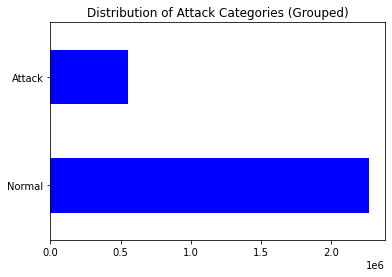

In [20]:
# Plotting binary grouped column Attack

train_attacks = dataset['Attack'].value_counts()
train_attacks.plot(kind='barh', color='blue')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

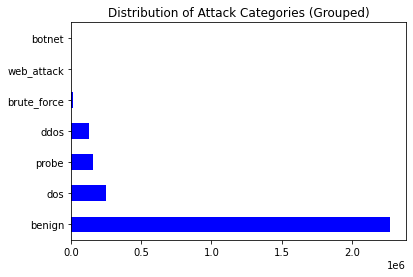

In [21]:
# Plotting multi-class grouped column Label_Category

train_attacks = dataset['Label_Category'].value_counts()
train_attacks.plot(kind='barh', color='blue')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories')

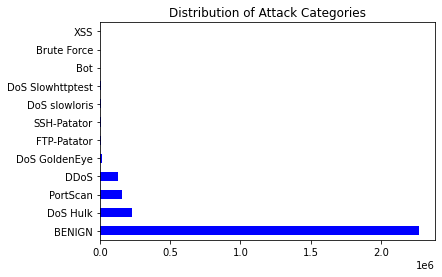

In [22]:
# Plotting multi-label column Label

train_attacks = dataset['Label'].value_counts()
train_attacks.plot(kind='barh', color='blue')
plt.title('Distribution of Attack Categories')

In [23]:
print('Total number of all attack classes :',len(dataset.Label.unique()))
print('Total number of attack categories :',len(dataset.Label_Category.unique()))

Total number of all attack classes : 12
Total number of attack categories : 7


# Splitting the dataset

Splitting dataset in 60:20:20 ratio, for training, testing and validation dataset. 
By stratifying with y label proportions of attacks remain the same throughout the 3 sets. 

In [24]:
# 3 Different labeling options
attacks = ['Label', 'Label_Category', 'Attack']

# xs=feature vectors, ys=labels
xs = dataset.drop(attacks, axis=1)
ys = dataset[attacks]

# split dataset - stratified
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.3, random_state=0, stratify=ys['Label'])

# Removing the columns with single unique values as it has no contribution in classification

In [25]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    # check for columns that only take one value
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['Fwd_URG_Flags',
 'Fwd_Header_Length',
 'Fwd_Avg_Bytes_Bulk',
 'Fwd_Avg_Packets_Bulk',
 'Fwd_Avg_Bulk_Rate',
 'Bwd_Avg_Bytes_Bulk',
 'Bwd_Avg_Packets_Bulk',
 'Bwd_Avg_Bulk_Rate']

In [26]:
x_train = x_train.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
dataset_copy = dataset.drop(to_drop, axis=1)

In [27]:
x_train.shape

(1979465, 69)

# Data Normalization

Min-max normalization technique is used to normalize the numerical values in dataset.

In [28]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_test = min_max_scaler.transform(x_test)

#  Feature Selection

Selecting K-best features by using chi2 scoring function for features

In [29]:
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit(x_train, y_train.Label)

In [30]:
# perform selectkbest with k=40

features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(x_train, y_train.Label)

x_train = fit.transform(x_train)
x_test = fit.transform(x_test)

In [31]:
new_features = dataset_copy.columns[features.get_support(indices=True)]

In [32]:
print('Number of features selected :',len(new_features))
new_features

Number of features selected : 40


Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Bwd_Packets_s', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'RST_Flag_Count', 'ACK_Flag_Count', 'URG_Flag_Count',
       'CWE_Flag_Count', 'Avg_Fwd_Segment_Size', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Active_Min', 'Idle_Mean', 'Idle_Std',
       'Idle_Max', 'Idle_Min'],
      dtype='object')

In [33]:
attack = np.array(['BENIGN', 'Bot', 'Brute Force', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
                   'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'XSS'])
attack_groups = np.array(['benign', 'botnet', 'brute_force', 'ddos', 'dos', 'probe', 'web_attack'])

# Applying Machine Learning classifier models

Each machine learning algorithm is applied in three different categories :

1. On all attack labels (12).
2. Binary Classifier (2).
3. Multi-class Classifier (7).

And then evaluate performance of each algorithm by confusion matrix plot.
Evaluate Accuracy, Precision, Recall, F1-score.

# 1. Support Vector Machine (SVM)

In [34]:
classifier = LinearSVC()

1. a) On all attack labels.

In [35]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  454.24710726737976


In [36]:
# predicting test results of SVM classifier on all labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.4958357810974121


Plotting Confusion Matrix of SVM classifier on all Labels 


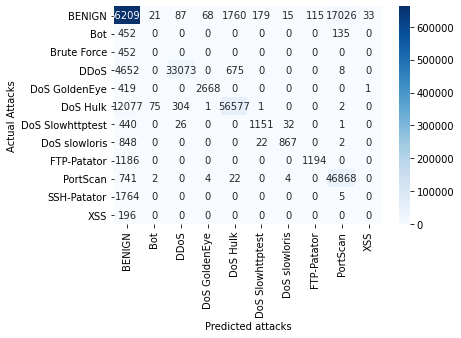

Predicted attacks,BENIGN,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,PortScan,XSS
Actual Attacks,,,,,,,,,,
BENIGN,662092,21,87,68,1760,179,15,115,17026,33
Bot,452,0,0,0,0,0,0,0,135,0
Brute Force,452,0,0,0,0,0,0,0,0,0
DDoS,4652,0,33073,0,675,0,0,0,8,0
DoS GoldenEye,419,0,0,2668,0,0,0,0,0,1
DoS Hulk,12077,75,304,1,56577,1,0,0,2,0
DoS Slowhttptest,440,0,26,0,0,1151,32,0,1,0
DoS slowloris,848,0,0,0,0,22,867,0,2,0
FTP-Patator,1186,0,0,0,0,0,0,1194,0,0


In [37]:
# Creating confusion matrix for SVM classifier on all labels.

confusion_svm_1 = pd.crosstab(y_test.Label, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of SVM classifier on all Labels ")

sn.heatmap(confusion_svm_1, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_svm_1

In [38]:
# Precision,Recall,F1-score for SVM classifier on all labels.

precision, recall, fscore, support = score(y_test.Label, y_predict)

d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,attack,precision,recall,fscore
0,BENIGN,0.966108,0.971670,0.968881
1,Bot,0.000000,0.000000,0.000000
2,Brute Force,0.000000,0.000000,0.000000
3,DDoS,0.987549,0.861097,0.919998
4,DoS GoldenEye,0.973367,0.863990,0.915423
5,DoS Hulk,0.958380,0.819517,0.883526
6,DoS Slowhttptest,0.850702,0.697576,0.766567
7,DoS slowloris,0.944444,0.498562,0.652616
8,FTP-Patator,0.912147,0.501681,0.647330
9,PortScan,0.731775,0.983774,0.839267


In [39]:
# Average Accuracy,Precision,Recall,F1-score for SVM classifier on all labels.

precision_svm_1, recall_svm_1, fscore_svm_1, support = score(y_test.Label, y_predict, average='macro')
accuracy_svm_1 = accuracy_score(y_test.Label, y_predict)
print("Accuracy of SVM classifier on all labels : ", accuracy_svm_1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of SVM classifier on all labels :  0.9483074652587455


1. b) Binary Classifier.

In [40]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  189.12931942939758


In [41]:
# predicting test results of SVM classifier on binary labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.07437896728515625


Plotting Confusion Matrix of SVM classifier on binary Labels 


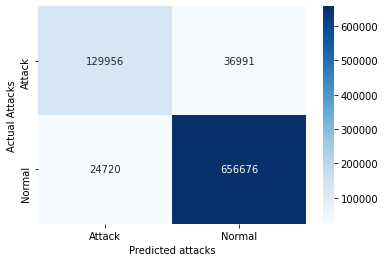

Predicted attacks,Attack,Normal
Actual Attacks,,
Attack,129956,36991
Normal,24720,656676


In [42]:
# Creating confusion matrix for SVM classifier on binary labels.

confusion_svm_2 = pd.crosstab(y_test.Attack, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of SVM classifier on binary Labels ")

sn.heatmap(confusion_svm_2, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_svm_2

In [43]:
# Precision,Recall,F1-score for SVM classifier on binary labels.

precision, recall, fscore, support = score(y_test.Attack, y_predict)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.840182,0.778427,0.808126
1,1,0.946673,0.963722,0.955121


In [44]:
# Average Accuracy,Precision,Recall,F1-score for SVM classifier on binary labels.

precision_svm_2, recall_svm_2, fscore_svm_2, n = score(y_test.Attack, y_predict, average='macro')
accuracy_svm_2 = accuracy_score(y_test.Attack, y_predict)
print("Accuracy of SVM classifier on binary labels : ", accuracy_svm_2)

Accuracy of SVM classifier on binary labels :  0.9272570175035334


1. c) Multi-class Classifier.

In [45]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  405.1454904079437


In [46]:
# predicting test results of SVM classifier on multi-class labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.48248934745788574


Plotting Confusion Matrix of SVM classifier on multi-class Labels 


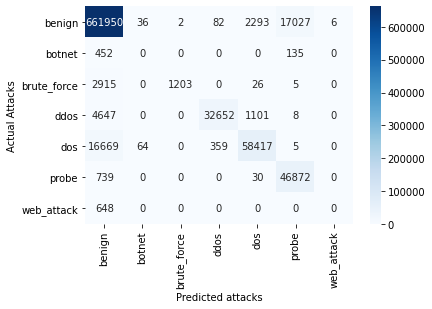

Predicted attacks,benign,botnet,brute_force,ddos,dos,probe,web_attack
Actual Attacks,,,,,,,
benign,661950,36,2,82,2293,17027,6
botnet,452,0,0,0,0,135,0
brute_force,2915,0,1203,0,26,5,0
ddos,4647,0,0,32652,1101,8,0
dos,16669,64,0,359,58417,5,0
probe,739,0,0,0,30,46872,0
web_attack,648,0,0,0,0,0,0


In [47]:
# Creating confusion matrix for SVM classifier on multi-class labels.

confusion_svm_3 = pd.crosstab(y_test.Label_Category, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of SVM classifier on multi-class Labels ")

sn.heatmap(confusion_svm_3, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_svm_3

In [48]:
# Precision,Recall,F1-score for SVM classifier on multi-class labels.

precision, recall, fscore, support = score(y_test.Label_Category, y_predict)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.962109,0.971462,0.966762
1,botnet,0.000000,0.000000,0.000000
2,brute_force,0.998340,0.289949,0.449384
3,ddos,0.986674,0.850135,0.913330
4,dos,0.944235,0.773592,0.850438
5,probe,0.731780,0.983858,0.839301
6,web_attack,0.000000,0.000000,0.000000


In [49]:
# Average Accuracy,Precision,Recall,F1-score for SVM classifier on multi-class labels.

precision_svm_3, recall_svm_3, fscore_svm_3, n = score(y_test.Label_Category, y_predict, average='macro')
accuracy_svm_3 = accuracy_score(y_test.Label_Category, y_predict)
print("Accuracy of SVM classifier on multi-class labels : ", accuracy_svm_3)

Accuracy of SVM classifier on multi-class labels :  0.9443043674551449


### Results for SVM:

In [50]:
print('Support Vector Machine: Precision / Recall / Fscore / Accuracy')

print('All Labels:', precision_svm_1, recall_svm_1, fscore_svm_1,  accuracy_svm_1)
print('Binary Labels:', precision_svm_2, recall_svm_2, fscore_svm_2, accuracy_svm_2)
print('Multi-class Labels:', precision_svm_3, recall_svm_3, fscore_svm_3, accuracy_svm_3)

Support Vector Machine: Precision / Recall / Fscore / Accuracy
All Labels: 0.6103726620259674 0.5164888817555738 0.5494671656464464 0.9483074652587455
Binary Labels: 0.8934276588134502 0.871074111344472 0.8816238067435893 0.9272570175035334
Multi-class Labels: 0.6604483528860229 0.5527137708530362 0.5741734874496957 0.9443043674551449


# 2. Decision Tree

In [51]:
classifier = DecisionTreeClassifier(random_state = 0)

1. a) On all attack labels.

In [52]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  97.02134418487549


In [53]:
# predicting test results of Decision Tree classifier on all labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.4498908519744873


Plotting Confusion Matrix of Decision Tree classifier on all Labels 


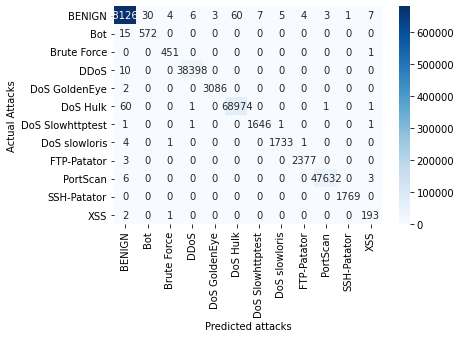

Predicted attacks,BENIGN,Bot,Brute Force,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,PortScan,SSH-Patator,XSS
Actual Attacks,,,,,,,,,,,,
BENIGN,681266,30,4,6,3,60,7,5,4,3,1,7
Bot,15,572,0,0,0,0,0,0,0,0,0,0
Brute Force,0,0,451,0,0,0,0,0,0,0,0,1
DDoS,10,0,0,38398,0,0,0,0,0,0,0,0
DoS GoldenEye,2,0,0,0,3086,0,0,0,0,0,0,0
DoS Hulk,60,0,0,1,0,68974,0,0,0,1,0,1
DoS Slowhttptest,1,0,0,1,0,0,1646,1,0,0,0,1
DoS slowloris,4,0,1,0,0,0,0,1733,1,0,0,0
FTP-Patator,3,0,0,0,0,0,0,0,2377,0,0,0


In [54]:
# Creating confusion matrix for Decision Tree classifier on all labels.

confusion_dt_1 = pd.crosstab(y_test.Label, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Decision Tree classifier on all Labels ")

sn.heatmap(confusion_dt_1, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_dt_1

In [55]:
# Precision,Recall,F1-score for Decision Tree classifier on all labels.

precision, recall, fscore, support = score(y_test.Label, y_predict)

d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,BENIGN,0.999849,0.999809,0.999829
1,Bot,0.950166,0.974446,0.962153
2,Brute Force,0.986871,0.997788,0.992299
3,DDoS,0.999792,0.999740,0.999766
4,DoS GoldenEye,0.999029,0.999352,0.999191
5,DoS Hulk,0.999131,0.999087,0.999109
6,DoS Slowhttptest,0.995765,0.997576,0.996670
7,DoS slowloris,0.996550,0.996550,0.996550
8,FTP-Patator,0.997901,0.998739,0.998320
9,PortScan,0.999916,0.999811,0.999864


In [56]:
# Average Accuracy,Precision,Recall,F1-score for Decision Tree classifier on all labels.

precision_dt_1, recall_dt_1, fscore_dt_1, support = score(y_test.Label, y_predict, average='macro')
accuracy_dt_1 = accuracy_score(y_test.Label, y_predict)
print("Accuracy of Decision Tree classifier on all labels : ", accuracy_dt_1)

Accuracy of Decision Tree classifier on all labels :  0.9997100229506226


In [57]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  96.87200260162354


In [58]:
# predicting test results of Decision Tree classifier on binary labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.20534729957580566


Plotting Confusion Matrix of Decision Tree classifier on binary Labels 


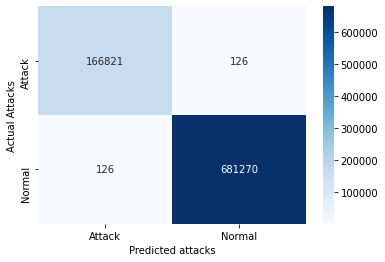

Predicted attacks,Attack,Normal
Actual Attacks,,
Attack,166821,126
Normal,126,681270


In [59]:
# Creating confusion matrix for Decision Tree classifier on binary labels.

confusion_dt_2 = pd.crosstab(y_test.Attack, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Decision Tree classifier on binary Labels ")

sn.heatmap(confusion_dt_2, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_dt_2

In [60]:
# Precision,Recall,F1-score for Decision Tree classifier on binary labels.

precision, recall, fscore, support = score(y_test.Attack, y_predict)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.999245,0.999245,0.999245
1,1,0.999815,0.999815,0.999815


In [61]:
# Average Accuracy,Precision,Recall,F1-score for Decision Tree classifier on binary labels.

precision_dt_2, recall_dt_2, fscore_dt_2, n = score(y_test.Attack, y_predict, average='macro')
accuracy_dt_2 = accuracy_score(y_test.Attack, y_predict)
print("Accuracy of Decision Tree classifier on binary labels : ", accuracy_dt_2)

Accuracy of Decision Tree classifier on binary labels :  0.9997029503396622


In [62]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  95.8577172756195


In [63]:
# predicting test results of Decision Tree classifier on multi-class labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.24169182777404785


Plotting Confusion Matrix of Decision Tree classifier on multi-class Labels 


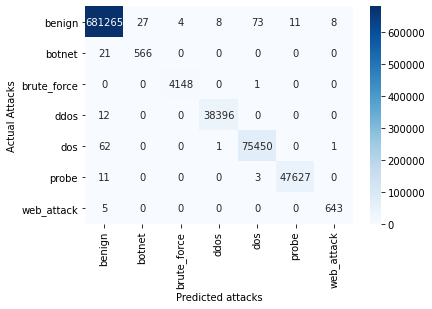

Predicted attacks,benign,botnet,brute_force,ddos,dos,probe,web_attack
Actual Attacks,,,,,,,
benign,681265,27,4,8,73,11,8
botnet,21,566,0,0,0,0,0
brute_force,0,0,4148,0,1,0,0
ddos,12,0,0,38396,0,0,0
dos,62,0,0,1,75450,0,1
probe,11,0,0,0,3,47627,0
web_attack,5,0,0,0,0,0,643


In [64]:
# Creating confusion matrix for Decision Tree classifier on multi-class labels.

confusion_dt_3 = pd.crosstab(y_test.Label_Category, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Decision Tree classifier on multi-class Labels ")

sn.heatmap(confusion_dt_3, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_dt_3

In [65]:
# Precision,Recall,F1-score for Decision Tree classifier on multi-class labels.

precision, recall, fscore, support = score(y_test.Label_Category, y_predict)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.999837,0.999808,0.999822
1,botnet,0.954469,0.964225,0.959322
2,brute_force,0.999037,0.999759,0.999398
3,ddos,0.999766,0.999688,0.999727
4,dos,0.998980,0.999152,0.999066
5,probe,0.999769,0.999706,0.999738
6,web_attack,0.986196,0.992284,0.989231


In [66]:
# Average Accuracy,Precision,Recall,F1-score for Decision Tree classifier on multi-class labels.

precision_dt_3, recall_dt_3, fscore_dt_3, n = score(y_test.Label_Category, y_predict, average='macro')
accuracy_dt_3 = accuracy_score(y_test.Label_Category, y_predict)
print("Accuracy of Decision Tree classifier on multi-class labels : ", accuracy_dt_3)

Accuracy of Decision Tree classifier on multi-class labels :  0.9997076654136358


### Results for Decision Tree:

In [67]:
print('Decission Tree Classifier : Precision / Recall / Fscore / Accuracy')

print('All Labels:', precision_dt_1, recall_dt_1, fscore_dt_1,  accuracy_dt_1)
print('Binary Labels:', precision_dt_2, recall_dt_2, fscore_dt_2, accuracy_dt_2)
print('Multi-class Labels:', precision_dt_3, recall_dt_3, fscore_dt_3, accuracy_dt_3)

Decission Tree Classifier : Precision / Recall / Fscore / Accuracy
All Labels: 0.9884414516786525 0.9956327114513193 0.9919721795956459 0.9997100229506226
Binary Labels: 0.999530177478858 0.999530177478858 0.999530177478858 0.9997029503396622
Multi-class Labels: 0.9911505813408323 0.9935173891628378 0.9923290838491127 0.9997076654136358


In [68]:
# 3. Naive Bayes Classifier

In [69]:
classifier = MultinomialNB()

In [70]:
# 1. a) On all attack labels.

In [71]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  11.925494194030762


In [72]:
# predicting test results of Naive Bayes classifier on all labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.332796573638916


Plotting Confusion Matrix of Naive Bayes classifier on all Labels 


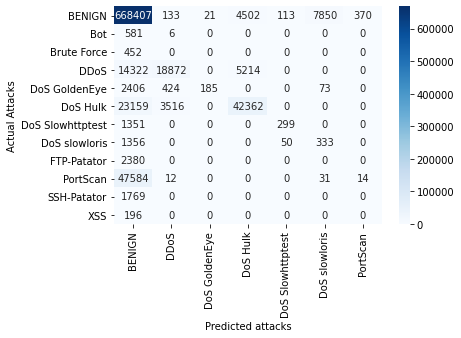

Predicted attacks,BENIGN,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,PortScan
Actual Attacks,,,,,,,
BENIGN,668407,133,21,4502,113,7850,370
Bot,581,6,0,0,0,0,0
Brute Force,452,0,0,0,0,0,0
DDoS,14322,18872,0,5214,0,0,0
DoS GoldenEye,2406,424,185,0,0,73,0
DoS Hulk,23159,3516,0,42362,0,0,0
DoS Slowhttptest,1351,0,0,0,299,0,0
DoS slowloris,1356,0,0,0,50,333,0
FTP-Patator,2380,0,0,0,0,0,0


In [73]:
# Creating confusion matrix for Naive Bayes classifier on all labels.

confusion_nb_1 = pd.crosstab(y_test.Label, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Naive Bayes classifier on all Labels ")

sn.heatmap(confusion_nb_1, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_nb_1

In [74]:
# Precision,Recall,F1-score for Naive Bayes classifier on all labels.

precision, recall, fscore, support = score(y_test.Label, y_predict)

d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,attack,precision,recall,fscore
0,BENIGN,0.874921,0.980938,0.924901
1,Bot,0.000000,0.000000,0.000000
2,Brute Force,0.000000,0.000000,0.000000
3,DDoS,0.821844,0.491356,0.615014
4,DoS GoldenEye,0.898058,0.059909,0.112325
5,DoS Hulk,0.813434,0.613613,0.699534
6,DoS Slowhttptest,0.647186,0.181212,0.283144
7,DoS slowloris,0.040183,0.191489,0.066427
8,FTP-Patator,0.000000,0.000000,0.000000
9,PortScan,0.036458,0.000294,0.000583


In [75]:
# Average Accuracy,Precision,Recall,F1-score for Naive Bayes classifier on all labels.

precision_nb_1, recall_nb_1, fscore_nb_1, support = score(y_test.Label, y_predict, average='macro')
accuracy_nb_1 = accuracy_score(y_test.Label, y_predict)
print("Accuracy of Naive Bayes classifier on all labels : ", accuracy_nb_1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Naive Bayes classifier on all labels :  0.8610573789139534


In [76]:
# 1. b) Binary Classifier.

In [77]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  26.92693853378296


In [78]:
# predicting test results of Naive Bayes classifier on binary labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.205549955368042


Plotting Confusion Matrix of Naive Bayes classifier on binary Labels 


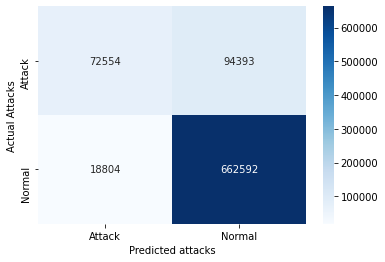

Predicted attacks,Attack,Normal
Actual Attacks,,
Attack,72554,94393
Normal,18804,662592


In [79]:
# Creating confusion matrix for Naive Bayes classifier on binary labels.

confusion_nb_2 = pd.crosstab(y_test.Attack, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Naive Bayes classifier on binary Labels ")

sn.heatmap(confusion_nb_2, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_nb_2

In [80]:
# Precision,Recall,F1-score for Naive Bayes classifier on binary labels.

precision, recall, fscore, support = score(y_test.Attack, y_predict)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.794172,0.434593,0.561770
1,1,0.875304,0.972404,0.921302


In [81]:
# Average Accuracy,Precision,Recall,F1-score for Naive Bayes classifier on binary labels.

precision_nb_2, recall_nb_2, fscore_nb_2, n = score(y_test.Attack, y_predict, average='macro')
accuracy_nb_2 = accuracy_score(y_test.Attack, y_predict)
print("Accuracy of Naive Bayes classifier on binary labels : ", accuracy_nb_2)

Accuracy of Naive Bayes classifier on binary labels :  0.8665669428521247


In [82]:
# 1. c) Multi-class Classifier.

In [83]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  8.319253921508789


In [84]:
# predicting test results of Naive Bayes classifier on multi-class labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  0.28006768226623535


Plotting Confusion Matrix of Naive Bayes classifier on multi-class Labels 


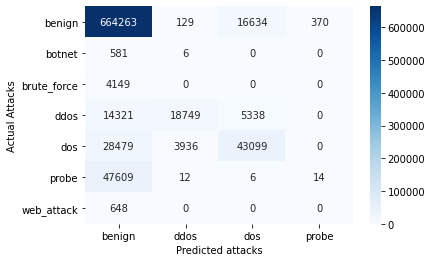

Predicted attacks,benign,ddos,dos,probe
Actual Attacks,,,,
benign,664263,129,16634,370
botnet,581,6,0,0
brute_force,4149,0,0,0
ddos,14321,18749,5338,0
dos,28479,3936,43099,0
probe,47609,12,6,14
web_attack,648,0,0,0


In [85]:
# Creating confusion matrix for Naive Bayes classifier on multi-class labels.

confusion_nb_3 = pd.crosstab(y_test.Label_Category, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Naive Bayes classifier on multi-class Labels ")

sn.heatmap(confusion_nb_3, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_nb_3

In [86]:
# Precision,Recall,F1-score for Naive Bayes classifier on multi-class labels.

precision, recall, fscore, support = score(y_test.Label_Category, y_predict)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,attack,precision,recall,fscore
0,benign,0.873973,0.974856,0.921662
1,botnet,0.000000,0.000000,0.000000
2,brute_force,0.000000,0.000000,0.000000
3,ddos,0.821172,0.488154,0.612312
4,dos,0.662277,0.570742,0.613112
5,probe,0.036458,0.000294,0.000583
6,web_attack,0.000000,0.000000,0.000000


In [87]:
# Average Accuracy,Precision,Recall,F1-score for Naive Bayes classifier on multi-class labels.

precision_nb_3, recall_nb_3, fscore_nb_3, n = score(y_test.Label_Category, y_predict, average='macro')
accuracy_nb_3 = accuracy_score(y_test.Label_Category, y_predict)
print("Accuracy of Naive Bayes classifier on multi-class labels : ", accuracy_nb_3)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Naive Bayes classifier on multi-class labels :  0.8559332722731253


In [88]:
### Results for Naive Bayes:

In [89]:
print('Naive Bayes: Precision / Recall / Fscore / Accuracy')

print('All Labels:', precision_nb_1, recall_nb_1, fscore_nb_1,  accuracy_nb_1)
print('Binary Labels:', precision_nb_2, recall_nb_2, fscore_nb_2, accuracy_nb_2)
print('Multi-class Labels:', precision_nb_3, recall_nb_3, fscore_nb_3, accuracy_nb_3)

Naive Bayes: Precision / Recall / Fscore / Accuracy
All Labels: 0.3443403606808013 0.20990094123148562 0.22516065133780527 0.8610573789139534
Binary Labels: 0.834738189432076 0.7034983634641163 0.7415362463788386 0.8665669428521247
Multi-class Labels: 0.34198287606723227 0.2905778934659667 0.3068098620024685 0.8559332722731253


In [90]:
# 6. Random Forest Classifier

In [91]:
classifier =  RandomForestClassifier()

In [92]:
# 1. a) On all attack labels.

In [93]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  1114.6141352653503


In [94]:
# predicting test results of Random Forest classifier on all labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  18.981845140457153


Plotting Confusion Matrix of Random Forest classifier on all Labels 


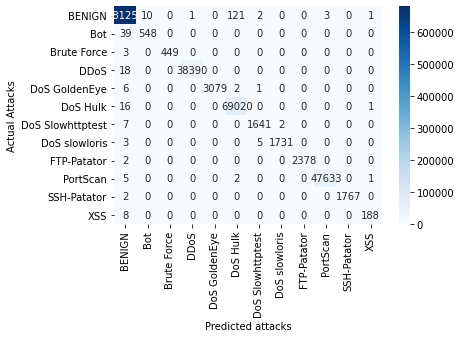

Predicted attacks,BENIGN,Bot,Brute Force,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,PortScan,SSH-Patator,XSS
Actual Attacks,,,,,,,,,,,,
BENIGN,681258,10,0,1,0,121,2,0,0,3,0,1
Bot,39,548,0,0,0,0,0,0,0,0,0,0
Brute Force,3,0,449,0,0,0,0,0,0,0,0,0
DDoS,18,0,0,38390,0,0,0,0,0,0,0,0
DoS GoldenEye,6,0,0,0,3079,2,1,0,0,0,0,0
DoS Hulk,16,0,0,0,0,69020,0,0,0,0,0,1
DoS Slowhttptest,7,0,0,0,0,0,1641,2,0,0,0,0
DoS slowloris,3,0,0,0,0,0,5,1731,0,0,0,0
FTP-Patator,2,0,0,0,0,0,0,0,2378,0,0,0


In [95]:
# Creating confusion matrix for Random Forest classifier on all labels.

confusion_rf_1 = pd.crosstab(y_test.Label, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Random Forest classifier on all Labels ")

sn.heatmap(confusion_rf_1, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_rf_1

In [96]:
# Precision,Recall,F1-score for Random Forest classifier on all labels.

precision, recall, fscore, support = score(y_test.Label, y_predict)

d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,BENIGN,0.999840,0.999797,0.999819
1,Bot,0.982079,0.933560,0.957205
2,Brute Force,1.000000,0.993363,0.996670
3,DDoS,0.999974,0.999531,0.999753
4,DoS GoldenEye,1.000000,0.997085,0.998541
5,DoS Hulk,0.998192,0.999754,0.998972
6,DoS Slowhttptest,0.995149,0.994545,0.994847
7,DoS slowloris,0.998846,0.995400,0.997120
8,FTP-Patator,1.000000,0.999160,0.999580
9,PortScan,0.999937,0.999832,0.999885


In [97]:
# Average Accuracy,Precision,Recall,F1-score for Random Forest classifier on all labels.

precision_rf_1, recall_rf_1, fscore_rf_1, support = score(y_test.Label, y_predict, average='macro')
accuracy_rf_1 = accuracy_score(y_test.Label, y_predict)
print("Accuracy of Random Forest classifier on all labels : ", accuracy_rf_1)

Accuracy of Random Forest classifier on all labels :  0.9996923414232215


In [98]:
# 1. b) Binary Classifier.

In [99]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  979.6364681720734


In [100]:
# predicting test results of Random Forest classifier on binary labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  13.558977603912354


Plotting Confusion Matrix of Random Forest classifier on binary Labels 


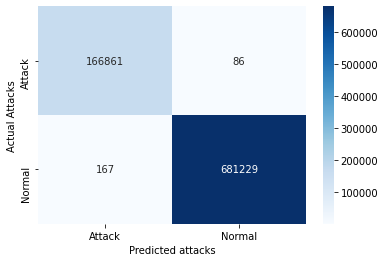

Predicted attacks,Attack,Normal
Actual Attacks,,
Attack,166861,86
Normal,167,681229


In [101]:
# Creating confusion matrix for Random Forest classifier on binary labels.

confusion_rf_2 = pd.crosstab(y_test.Attack, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Random Forest classifier on binary Labels ")

sn.heatmap(confusion_rf_2, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_rf_2

In [102]:
# Precision,Recall,F1-score for Random Forest classifier on binary labels.

precision, recall, fscore, support = score(y_test.Attack, y_predict)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.999000,0.999485,0.999242
1,1,0.999874,0.999755,0.999814


In [103]:
# Average Accuracy,Precision,Recall,F1-score for Random Forest classifier on binary labels.

precision_rf_2, recall_rf_2, fscore_rf_2, n = score(y_test.Attack, y_predict, average='macro')
accuracy_rf_2 = accuracy_score(y_test.Attack, y_predict)
print("Accuracy of Random Forest classifier on binary labels : ", accuracy_rf_2)

Accuracy of Random Forest classifier on binary labels :  0.9997017715711687


In [104]:
# 1. c) Multi-class Classifier.

In [105]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  1038.400384902954


In [106]:
# predicting test results of Random Forest classifier on multi-class labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  16.290579080581665


Plotting Confusion Matrix of Random Forest classifier on multi-class Labels 


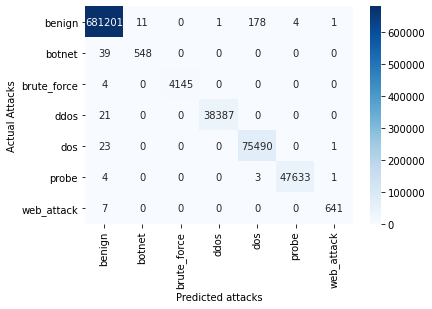

Predicted attacks,benign,botnet,brute_force,ddos,dos,probe,web_attack
Actual Attacks,,,,,,,
benign,681201,11,0,1,178,4,1
botnet,39,548,0,0,0,0,0
brute_force,4,0,4145,0,0,0,0
ddos,21,0,0,38387,0,0,0
dos,23,0,0,0,75490,0,1
probe,4,0,0,0,3,47633,1
web_attack,7,0,0,0,0,0,641


In [107]:
# Creating confusion matrix for Random Forest classifier on multi-class labels.

confusion_rf_3 = pd.crosstab(y_test.Label_Category, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Random Forest classifier on multi-class Labels ")

sn.heatmap(confusion_rf_3, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_rf_3

In [108]:
# Precision,Recall,F1-score for Random Forest classifier on multi-class labels.

precision, recall, fscore, support = score(y_test.Label_Category, y_predict)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.999856,0.999714,0.999785
1,botnet,0.980322,0.933560,0.956370
2,brute_force,1.000000,0.999036,0.999518
3,ddos,0.999974,0.999453,0.999714
4,dos,0.997608,0.999682,0.998644
5,probe,0.999916,0.999832,0.999874
6,web_attack,0.995342,0.989198,0.992260


In [109]:
# Average Accuracy,Precision,Recall,F1-score for Random Forest classifier on multi-class labels.

precision_rf_3, recall_rf_3, fscore_rf_3, n = score(y_test.Label_Category, y_predict, average='macro')
accuracy_rf_3 = accuracy_score(y_test.Label_Category, y_predict)
print("Accuracy of Random Forest classifier on multi-class labels : ", accuracy_rf_3)

Accuracy of Random Forest classifier on multi-class labels :  0.9996487269889656


In [110]:
### Results for Random Forest:

In [111]:
print('Random Forest Classifier : Precision / Recall / Fscore / Accuracy')

print('All Labels:', precision_rf_1, recall_rf_1, fscore_rf_1,  accuracy_rf_1)
print('Binary Labels:', precision_rf_2, recall_rf_2, fscore_rf_2, accuracy_rf_2)
print('Multi-class Labels:', precision_rf_3, recall_rf_3, fscore_rf_3, accuracy_rf_3)

Random Forest Classifier : Precision / Recall / Fscore / Accuracy
All Labels: 0.9965258133731131 0.989173443380828 0.9927834587624944 0.9996923414232215
Binary Labels: 0.9994369705740411 0.9996198906823011 0.9995283994730426 0.9997017715711687
Multi-class Labels: 0.9961454034238569 0.9886393196275745 0.9923091968453345 0.9996487269889656
